In [136]:
!pip install nltk

You should consider upgrading via the 'C:\framework\env\Scripts\python.exe -m pip install --upgrade pip' command.


In [137]:
!python -m nltk.downloader stopwords
!python -m nltk.downloader punkt
!python -m nltk.downloader wordnet
!python -m nltk.downloader 


C:\Users\Meyyappan\AppData\Local\Programs\Python\Python39\lib\runpy.py:127: RuntimeWarning: 'nltk.downloader' found in sys.modules after import of package 'nltk', but prior to execution of 'nltk.downloader'; this may result in unpredictable behaviour
  warn(RuntimeWarning(msg))
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Meyyappan\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
C:\Users\Meyyappan\AppData\Local\Programs\Python\Python39\lib\runpy.py:127: RuntimeWarning: 'nltk.downloader' found in sys.modules after import of package 'nltk', but prior to execution of 'nltk.downloader'; this may result in unpredictable behaviour
  warn(RuntimeWarning(msg))
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Meyyappan\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
C:\Users\Meyyappan\AppData\Local\Programs\Python\Python39\lib\runpy.py:127: RuntimeWarning: 'nltk.downloader' found in sys

showing info https://raw.githubusercontent.com/nltk/nltk_data/gh-pages/index.xml

C:\Users\Meyyappan\AppData\Local\Programs\Python\Python39\lib\runpy.py:127: RuntimeWarning: 'nltk.downloader' found in sys.modules after import of package 'nltk', but prior to execution of 'nltk.downloader'; this may result in unpredictable behaviour
  warn(RuntimeWarning(msg))


In [138]:

!pip install textblob
!pip install wordcloud
!pip install contractions

You should consider upgrading via the 'C:\framework\env\Scripts\python.exe -m pip install --upgrade pip' command.


You should consider upgrading via the 'C:\framework\env\Scripts\python.exe -m pip install --upgrade pip' command.


You should consider upgrading via the 'C:\framework\env\Scripts\python.exe -m pip install --upgrade pip' command.


In [1]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

import re
import string




In [2]:
df=pd.read_csv(r"C:\Users\Meyyappan\Downloads\chatgpt_reviews - chatgpt_reviews.csv")
df.head()

,date,title,review,rating,username,helpful_votes,review_length,platform,language,location,version,verified_purchase
0,2/15/2025,Impressive,Mother former community upon vote fact. Sure s...,2,ybass,68,78,Mobile,es,Canada,3.0,No
1,10/16/2024,Waste of Time,General paper understand main. Or age half won...,5,glenn33,71,193,Web,de,India,4.1,Yes
2,10/16/2024,Waste of Time,Here situation his high stage. Agree certainly...,4,debbie27,66,184,Web,hi,India,4.1,Yes
3,12/21/2024,Not Accurate,Rule court behind growth reality. Tonight whos...,1,hannahrussell,5,193,Web,fr,Canada,4.0,Yes
4,3/23/2025,Fantastic Experience,Case opportunity season road write. Effort gre...,3,cnorton,71,131,Web,hi,Australia,4.1,No


In [3]:
df.shape

(10000, 12)

In [4]:
df.rename(columns=lambda x: x.strip().lower().replace(" ", "_"), inplace=True)
df.columns

Index(['date', 'title', 'review', 'rating', 'username', 'helpful_votes',
       'review_length', 'platform', 'language', 'location', 'version',
       'verified_purchase'],
      dtype='object')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   date               10000 non-null  object 
 1   title              10000 non-null  object 
 2   review             10000 non-null  object 
 3   rating             10000 non-null  int64  
 4   username           10000 non-null  object 
 5   helpful_votes      10000 non-null  int64  
 6   review_length      10000 non-null  int64  
 7   platform           10000 non-null  object 
 8   language           10000 non-null  object 
 9   location           10000 non-null  object 
 10  version            10000 non-null  float64
 11  verified_purchase  10000 non-null  object 
dtypes: float64(1), int64(3), object(8)
memory usage: 937.6+ KB


In [6]:
df['date'] = pd.to_datetime(df['date'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   date               10000 non-null  datetime64[ns]
 1   title              10000 non-null  object        
 2   review             10000 non-null  object        
 3   rating             10000 non-null  int64         
 4   username           10000 non-null  object        
 5   helpful_votes      10000 non-null  int64         
 6   review_length      10000 non-null  int64         
 7   platform           10000 non-null  object        
 8   language           10000 non-null  object        
 9   location           10000 non-null  object        
 10  version            10000 non-null  float64       
 11  verified_purchase  10000 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(3), object(7)
memory usage: 937.6+ KB


In [7]:
print(df.duplicated().sum())

0


In [8]:
df.describe(include="all")

,date,title,review,rating,username,helpful_votes,review_length,platform,language,location,version,verified_purchase
count,10000,10000,10000,10000.000000,10000,10000.000000,10000.000000,10000,10000,10000,10000.000000,10000
unique,NaN,10,10000,NaN,9460,NaN,NaN,2,5,6,NaN,2
top,NaN,Buggy,Painting likely land ability it. Administratio...,NaN,owilliams,NaN,NaN,Mobile,en,Canada,NaN,No
freq,NaN,1037,1,NaN,6,NaN,NaN,5011,2016,1711,NaN,5116
mean,2024-09-25 04:15:36,NaN,NaN,2.987000,NaN,50.347800,147.034000,NaN,NaN,NaN,3.651070,NaN
min,2024-03-26 00:00:00,NaN,NaN,1.000000,NaN,0.000000,30.000000,NaN,NaN,NaN,3.000000,NaN
25%,2024-06-26 00:00:00,NaN,NaN,2.000000,NaN,25.000000,122.000000,NaN,NaN,NaN,3.500000,NaN
50%,2024-09-27 00:00:00,NaN,NaN,3.000000,NaN,50.000000,151.000000,NaN,NaN,NaN,4.000000,NaN
75%,2024-12-26 00:00:00,NaN,NaN,4.000000,NaN,75.000000,176.000000,NaN,NaN,NaN,4.100000,NaN
max,2025-03-26 00:00:00,NaN,NaN,5.000000,NaN,100.000000,199.000000,NaN,NaN,NaN,4.100000,NaN


In [9]:
assert pd.notnull(df).all().all()

In [10]:
df["rating"].value_counts()

rating
1    2062
5    2013
2    2007
4    1975
3    1943
Name: count, dtype: int64

In [11]:
df["platform"].value_counts()

platform
Mobile    5011
Web       4989
Name: count, dtype: int64

In [12]:
df["language"].value_counts()

language
en    2016
fr    2013
de    2001
hi    1991
es    1979
Name: count, dtype: int64

In [13]:
df["location"].value_counts()

location
Canada       1711
UK           1686
Germany      1664
India        1659
USA          1654
Australia    1626
Name: count, dtype: int64

In [14]:
df["version"].value_counts()

version
4.1    2522
3.0    2496
4.0    2491
3.5    2491
Name: count, dtype: int64

In [15]:
df["verified_purchase"].value_counts()

verified_purchase
No     5116
Yes    4884
Name: count, dtype: int64

In [16]:
df[["title","review"]]

,title,review
0,Impressive,Mother former community upon vote fact. Sure s...
1,Waste of Time,General paper understand main. Or age half won...
2,Waste of Time,Here situation his high stage. Agree certainly...
3,Not Accurate,Rule court behind growth reality. Tonight whos...
4,Fantastic Experience,Case opportunity season road write. Effort gre...
...,...,...
9995,Very Helpful,Little section hit her through. Likely job ind...
9996,Buggy,Throw with record relationship help reduce vot...
9997,Not Accurate,Within nothing study charge all. Toward milita...
9998,Needs Improvement,Rule kitchen trouble cultural.\nDeep manage ad...


In [17]:
df["title"].nunique()

10

In [18]:
df["title"].value_counts()

title
Buggy                   1037
Very Helpful            1019
Waste of Time           1018
Too Slow                1016
Superb!                 1012
Great Tool!             1001
Needs Improvement        994
Fantastic Experience     984
Impressive               970
Not Accurate             949
Name: count, dtype: int64

In [157]:
!pip install contractions

You should consider upgrading via the 'C:\framework\env\Scripts\python.exe -m pip install --upgrade pip' command.


In [158]:
!pip install nltk


You should consider upgrading via the 'C:\framework\env\Scripts\python.exe -m pip install --upgrade pip' command.


In [159]:
! pip install nltk

You should consider upgrading via the 'C:\framework\env\Scripts\python.exe -m pip install --upgrade pip' command.


In [160]:
pip install nltk

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: c:\Users\Meyyappan\AppData\Local\Programs\Python\Python39\python.exe -m pip install --upgrade pip


In [19]:
import nltk


In [20]:
from nltk.corpus import stopwords

In [163]:
pip install textblob


[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: c:\Users\Meyyappan\AppData\Local\Programs\Python\Python39\python.exe -m pip install --upgrade pip


In [164]:
pip install wordcloud

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: c:\Users\Meyyappan\AppData\Local\Programs\Python\Python39\python.exe -m pip install --upgrade pip


In [165]:
pip install contractions

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: c:\Users\Meyyappan\AppData\Local\Programs\Python\Python39\python.exe -m pip install --upgrade pip


In [21]:
import re
import string
import nltk

from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer

from textblob import TextBlob
from wordcloud import WordCloud
import contractions


import os
import warnings
warnings.filterwarnings('ignore')
nltk.download('stopwords')
nltk.download('punkt_tab')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Meyyappan\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\Meyyappan\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Meyyappan\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [22]:
stop_words = set(stopwords.words('english'))

def clean_text(text):
    # Convert to lowercase
    text = str(text).lower()

    # Convert the txt expand
    text = contractions.fix(text)

    # Remove extra spaces
    text = re.sub(' +', ' ', text)

    # Remove text in square brackets
    text = re.sub(r'\[.*?\]', '', text)

    # Remove links
    text = re.sub(r'https?://\S+|www\.\S+', '', text)

    # Remove HTML tags
    text = re.sub(r'<.*?>+', '', text)

    # Remove newline characters
    text = re.sub(r'\n', '', text)

    # Remove punctuation
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)

    # Remove special characters and numbers (if any remain)
    text = re.sub(r'[^a-z\s]', '', text)

    # Remove stopwords
    words = text.split()
    words = [word for word in words if word not in stop_words]

    return ' '.join(words)

df['clean_review'] = df['review'].apply(clean_text)

# View the cleaned reviews
df[['review', 'clean_review']].head()

,review,clean_review
0,Mother former community upon vote fact. Sure s...,mother former community upon vote fact sure st...
1,General paper understand main. Or age half won...,general paper understand main age half wonder ...
2,Here situation his high stage. Agree certainly...,situation high stage agree certainly blue thou...
3,Rule court behind growth reality. Tonight whos...,rule court behind growth reality tonight whose...
4,Case opportunity season road write. Effort gre...,case opportunity season road write effort gree...


In [23]:
lemmatizer = WordNetLemmatizer()

def tokenize_and_lemmatize(text):
    tokens = word_tokenize(text)  # Tokenize
    lemmatized = [lemmatizer.lemmatize(token) for token in tokens if token.isalpha()]  # Remove numbers and punctuation
    return ' '.join(lemmatized)

# Apply to cleaned text
df['lemmatized_review'] = df['clean_review'].apply(tokenize_and_lemmatize)
df[['clean_review','lemmatized_review']]

,clean_review,lemmatized_review
0,mother former community upon vote fact sure st...,mother former community upon vote fact sure st...
1,general paper understand main age half wonder ...,general paper understand main age half wonder ...
2,situation high stage agree certainly blue thou...,situation high stage agree certainly blue thou...
3,rule court behind growth reality tonight whose...,rule court behind growth reality tonight whose...
4,case opportunity season road write effort gree...,case opportunity season road write effort gree...
...,...,...
9995,little section hit likely job indicate detail ...,little section hit likely job indicate detail ...
9996,throw record relationship help reduce voteimpa...,throw record relationship help reduce voteimpa...
9997,within nothing study charge toward military al...,within nothing study charge toward military al...
9998,rule kitchen trouble culturaldeep manage addre...,rule kitchen trouble culturaldeep manage addre...


In [24]:
def analy_senti(text):
    blob = TextBlob(str(text))
    return pd.Series([blob.sentiment.polarity, blob.sentiment.subjectivity])

df[['polarity', 'subjectivity']] = df['lemmatized_review'].apply(analy_senti)
df.head()

,date,title,review,rating,username,helpful_votes,review_length,platform,language,location,version,verified_purchase,clean_review,lemmatized_review,polarity,subjectivity
0,2025-02-15,Impressive,Mother former community upon vote fact. Sure s...,2,ybass,68,78,Mobile,es,Canada,3.0,No,mother former community upon vote fact sure st...,mother former community upon vote fact sure st...,0.291667,0.546296
1,2024-10-16,Waste of Time,General paper understand main. Or age half won...,5,glenn33,71,193,Web,de,India,4.1,Yes,general paper understand main age half wonder ...,general paper understand main age half wonder ...,0.122159,0.333807
2,2024-10-16,Waste of Time,Here situation his high stage. Agree certainly...,4,debbie27,66,184,Web,hi,India,4.1,Yes,situation high stage agree certainly blue thou...,situation high stage agree certainly blue thou...,0.092302,0.574762
3,2024-12-21,Not Accurate,Rule court behind growth reality. Tonight whos...,1,hannahrussell,5,193,Web,fr,Canada,4.0,Yes,rule court behind growth reality tonight whose...,rule court behind growth reality tonight whose...,-0.133333,0.519048
4,2025-03-23,Fantastic Experience,Case opportunity season road write. Effort gre...,3,cnorton,71,131,Web,hi,Australia,4.1,No,case opportunity season road write effort gree...,case opportunity season road write effort gree...,0.175000,0.391667


In [25]:
def label_sentiment(p):
    if p > 0:
        return 'Positive'
    elif p < 0:
        return 'Negative'
    else:
        return 'Neutral'

df['sentiment'] = df['polarity'].apply(label_sentiment)
df.head()

,date,title,review,rating,username,helpful_votes,review_length,platform,language,location,version,verified_purchase,clean_review,lemmatized_review,polarity,subjectivity,sentiment
0,2025-02-15,Impressive,Mother former community upon vote fact. Sure s...,2,ybass,68,78,Mobile,es,Canada,3.0,No,mother former community upon vote fact sure st...,mother former community upon vote fact sure st...,0.291667,0.546296,Positive
1,2024-10-16,Waste of Time,General paper understand main. Or age half won...,5,glenn33,71,193,Web,de,India,4.1,Yes,general paper understand main age half wonder ...,general paper understand main age half wonder ...,0.122159,0.333807,Positive
2,2024-10-16,Waste of Time,Here situation his high stage. Agree certainly...,4,debbie27,66,184,Web,hi,India,4.1,Yes,situation high stage agree certainly blue thou...,situation high stage agree certainly blue thou...,0.092302,0.574762,Positive
3,2024-12-21,Not Accurate,Rule court behind growth reality. Tonight whos...,1,hannahrussell,5,193,Web,fr,Canada,4.0,Yes,rule court behind growth reality tonight whose...,rule court behind growth reality tonight whose...,-0.133333,0.519048,Negative
4,2025-03-23,Fantastic Experience,Case opportunity season road write. Effort gre...,3,cnorton,71,131,Web,hi,Australia,4.1,No,case opportunity season road write effort gree...,case opportunity season road write effort gree...,0.175000,0.391667,Positive


In [26]:
df.to_csv("cleaned_reviews.csv", index=False)

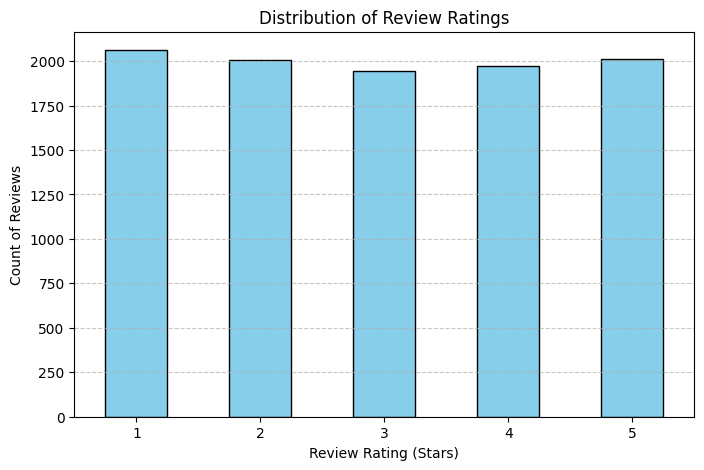

In [169]:
#📊 1. What is the distribution of review ratings?
# Plot the distribution of ratings
plt.figure(figsize=(8,5))
df['rating'].value_counts().sort_index().plot(kind='bar', color='skyblue', edgecolor='black')
# Labels and title
plt.xlabel("Review Rating (Stars)")
plt.ylabel("Count of Reviews")
plt.title("Distribution of Review Ratings")
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
# Show the plot
plt.show()

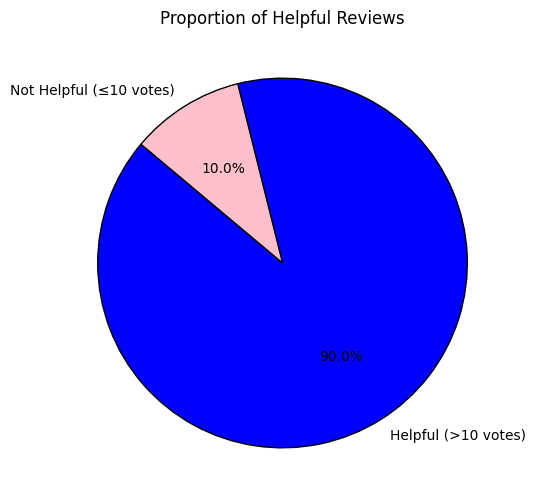

In [170]:
# 2. How many reviews were marked as helpful (above a certain threshold)?
# Define threshold for "helpful" reviews
threshold = 10

# Count the number of helpful and non-helpful reviews
helpful_count = (df['helpful_votes'] > threshold).sum()
not_helpful_count = (df['helpful_votes'] <= threshold).sum()

# Labels and data
labels = ["Helpful (>"+str(threshold)+" votes)", "Not Helpful (≤"+str(threshold)+" votes)"]
sizes = [helpful_count, not_helpful_count]
colors = ["blue", "pink"]

# Plot the pie chart
plt.figure(figsize=(6,6))
plt.pie(sizes, labels=labels, autopct="%1.1f%%", colors=colors, startangle=140, wedgeprops={'edgecolor': 'black'})
plt.title("Proportion of Helpful Reviews")

# Show the plot
plt.show()

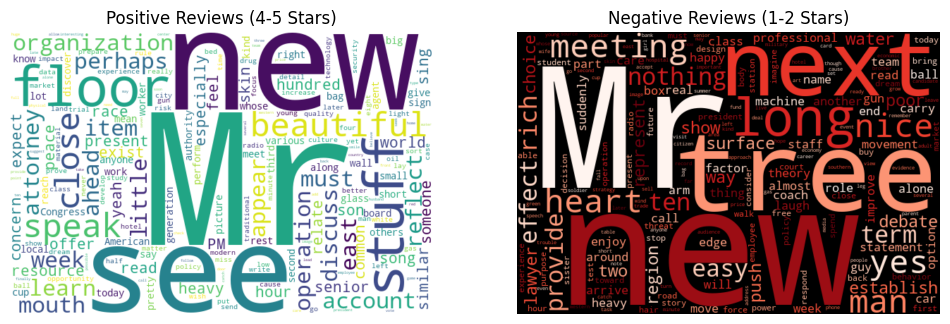

In [171]:
# What are the most common keywords in positive vs. negative reviews?
# Generate word clouds for positive (4-5 stars) and negative (1-2 stars) reviews
positive_reviews = " ".join(df[df['rating'] >= 4]['review'].astype(str))
negative_reviews = " ".join(df[df['rating'] <= 2]['review'].astype(str))

# Create word clouds
positive_wordcloud = WordCloud(width=600, height=400, background_color='white').generate(positive_reviews)
negative_wordcloud = WordCloud(width=600, height=400, background_color='black', colormap='Reds').generate(negative_reviews)

# Display word clouds
fig, ax = plt.subplots(1, 2, figsize=(12, 6))
ax[0].imshow(positive_wordcloud, interpolation='bilinear')
ax[0].set_title("Positive Reviews (4-5 Stars)")
ax[0].axis("off")

ax[1].imshow(negative_wordcloud, interpolation='bilinear')
ax[1].set_title("Negative Reviews (1-2 Stars)")
ax[1].axis("off")

plt.show()

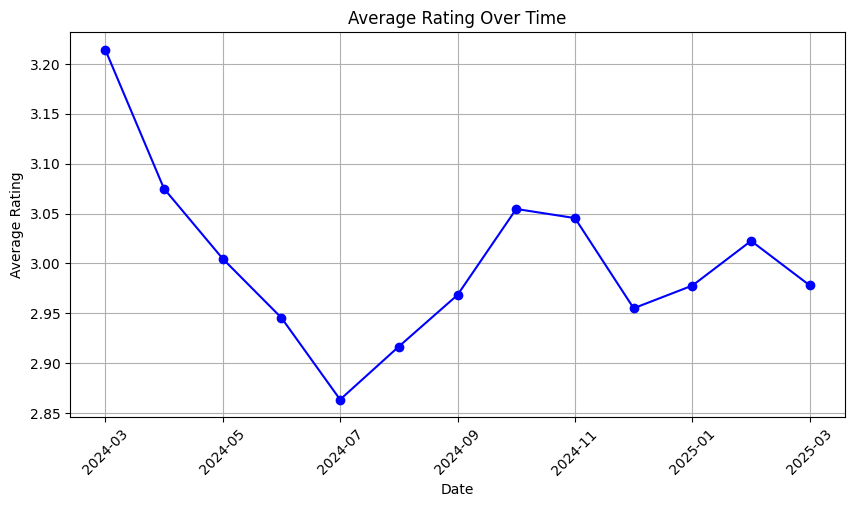

In [172]:
#📆 4. How has the average rating changed over time?
# Ensure the date column is in datetime format
df['date'] = pd.to_datetime(df['date'], errors='coerce')

# Drop NoT values (invalid dates)
df = df.dropna(subset=['date'])

# Convert date to year-month period
df['year_month'] = df['date'].dt.to_period("M")

# Compute average rating per month
df_avg_rating = df.groupby('year_month')['rating'].mean()

# Convert period to string for plotting
df_avg_rating.index = df_avg_rating.index.astype(str)

# Plot the average rating over time
plt.figure(figsize=(10,5))
df_avg_rating.plot(marker='o', linestyle='-', color='blue')

# Labels and title
plt.xlabel("Date")
plt.ylabel("Average Rating")
plt.title("Average Rating Over Time")
plt.xticks(rotation=45)
plt.grid(True)

# Show the plot
plt.show()

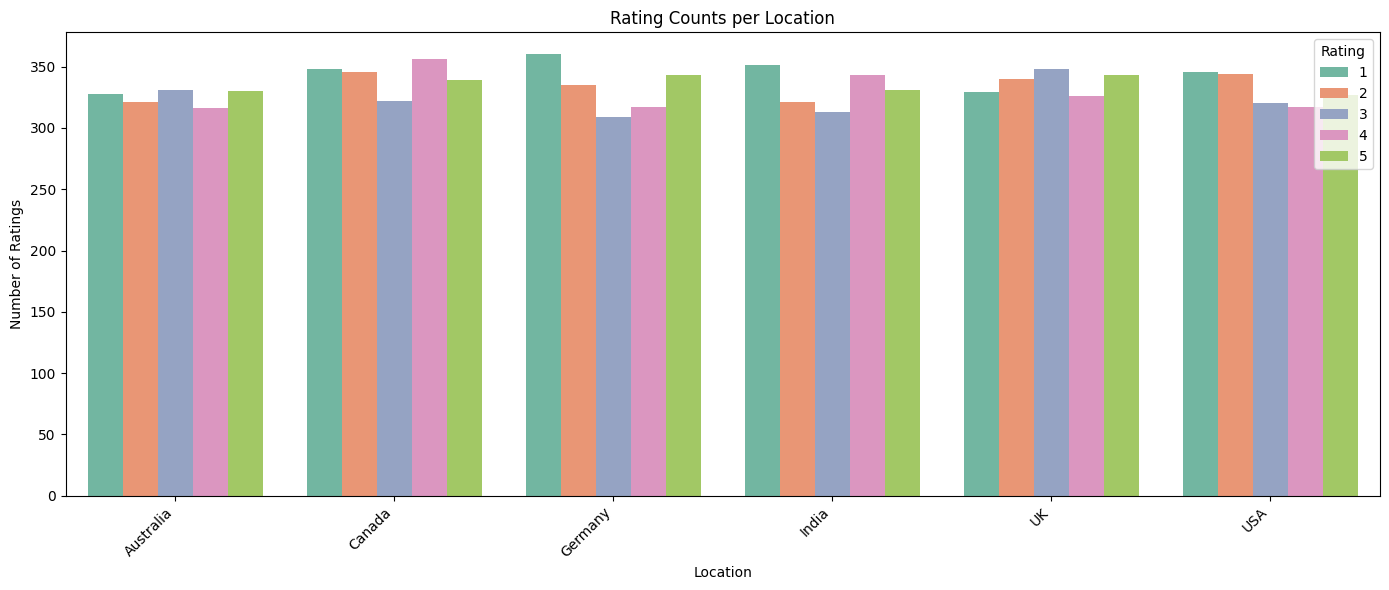

In [173]:
#🌍 5. How do ratings vary by user location?
# Ensure 'location' and 'rating' columns exist

df['rating'] = df['rating'].astype(str)
rating_location = df.groupby(['location', 'rating']).size().reset_index(name='count')

plt.figure(figsize=(14, 6))
sns.barplot(data=rating_location, x='location', y='count', hue='rating', palette='Set2')

plt.title('Rating Counts per Location')
plt.xlabel('Location')
plt.ylabel('Number of Ratings')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Rating')
plt.tight_layout()
plt.show()

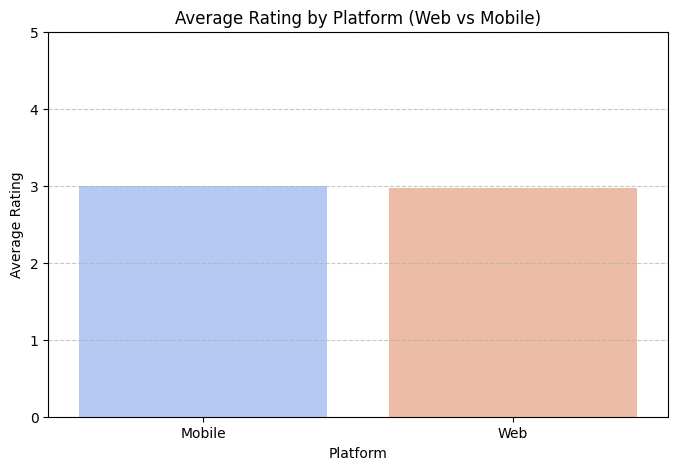

In [174]:
# 🧑‍💻 6. Which platform (Web vs Mobile) gets better reviews?
#  Platform Comparison (Web vs Mobile)
if 'platform' in df.columns:
    # Convert 'rating' back to numeric for mean calculation
    df['rating'] = pd.to_numeric(df['rating'], errors='coerce')
    # Drop any rows where the conversion resulted in NaN (if any)
    df = df.dropna(subset=['rating'])

    platform_avg_rating = df.groupby('platform')['rating'].mean()

    plt.figure(figsize=(8,5))
    sns.barplot(x=platform_avg_rating.index, y=platform_avg_rating.values, palette='coolwarm')

    plt.xlabel("Platform")
    plt.ylabel("Average Rating")
    plt.title("Average Rating by Platform (Web vs Mobile)")
    plt.ylim(0, 5)
    plt.grid(axis='y', linestyle='--', alpha=0.7)

    plt.show()
else:
    print("The dataset does not contain a 'platform' column.")

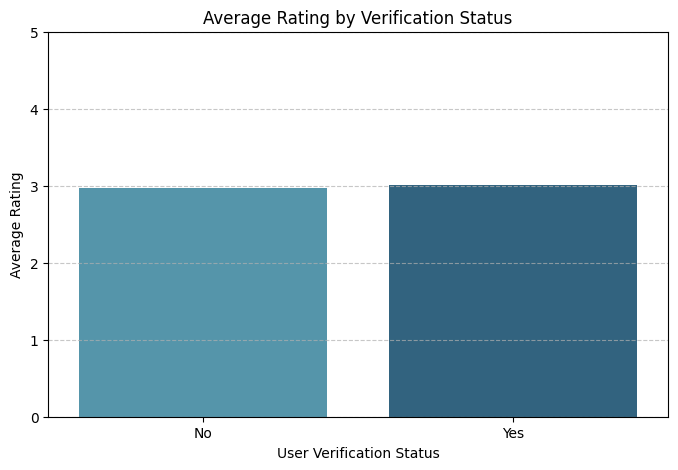

In [175]:
#✅❌ 7. Are verified users more satisfied than non-verified ones?
#  Verified vs. Non-Verified Users Comparison
if 'verified_purchase' in df.columns:
    verified_avg_rating = df.groupby('verified_purchase')['rating'].mean()

    plt.figure(figsize=(8,5))
    sns.barplot(x=verified_avg_rating.index, y=verified_avg_rating.values, palette='YlGnBu_d')

    plt.xlabel("User Verification Status")
    plt.ylabel("Average Rating")
    plt.title("Average Rating by Verification Status")
    plt.ylim(0, 5)
    plt.grid(axis='y', linestyle='--', alpha=0.7)

    plt.show()
else:
    print("The dataset does not contain a 'verified' column.")

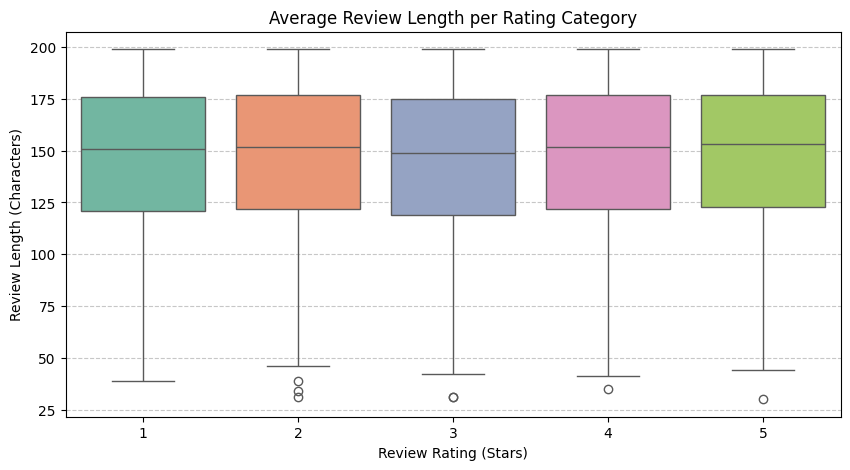

In [176]:
#🔠 8. What’s the average length of reviews per rating category?
# Average Review Length per Rating Category
df['review_length'] = df['review'].astype(str).apply(len)

plt.figure(figsize=(10,5))
sns.boxplot(x=df['rating'], y=df['review_length'], palette='Set2')

plt.xlabel("Review Rating (Stars)")
plt.ylabel("Review Length (Characters)")
plt.title("Average Review Length per Rating Category")
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.show()

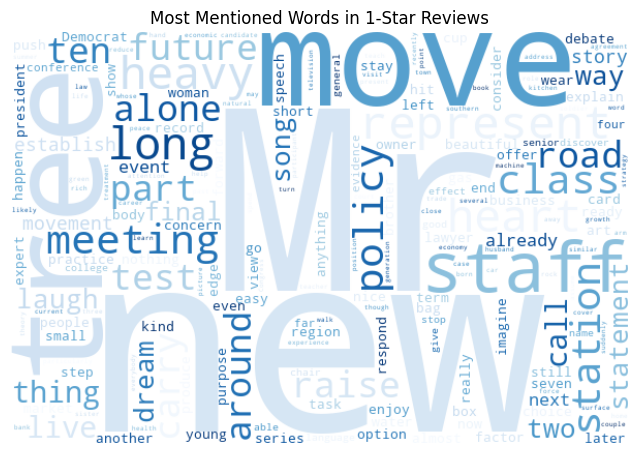

In [177]:
#💬 9. What are the most mentioned words in 1-star reviews?
# Most Mentioned Words in 1-Star Reviews
one_star_reviews = " ".join(df[df['rating'] == 1]['review'].astype(str))
one_star_wordcloud = WordCloud(width=600, height=400, background_color='white', colormap='Blues').generate(one_star_reviews)

plt.figure(figsize=(8,6))
plt.imshow(one_star_wordcloud, interpolation='bilinear')
plt.title("Most Mentioned Words in 1-Star Reviews")
plt.axis("off")
plt.show()

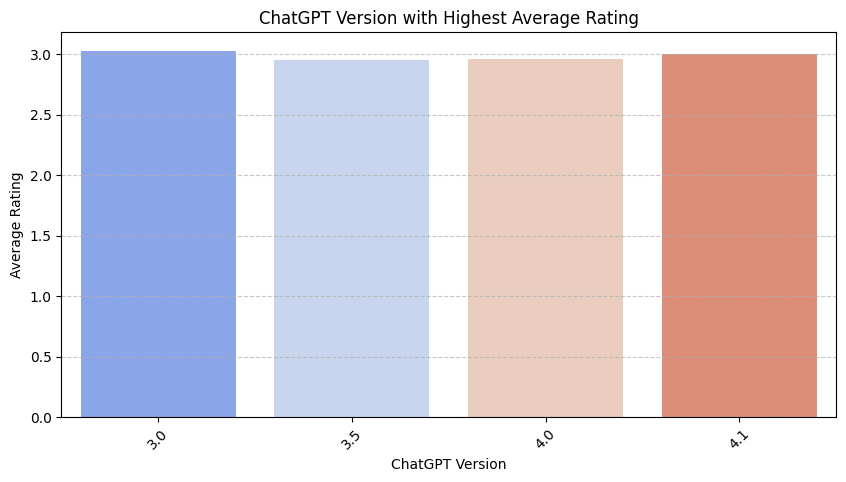

In [178]:
#📱🧪 10. What ChatGPT version received the highest average rating?
#  ChatGPT Version with Highest Average Rating
if 'version' in df.columns:
    version_avg_rating = df.groupby('version')['rating'].mean().sort_values(ascending=False)

    plt.figure(figsize=(10,5))
    sns.barplot(x=version_avg_rating.index, y=version_avg_rating.values, palette='coolwarm')

    plt.xlabel("ChatGPT Version")
    plt.ylabel("Average Rating")
    plt.title("ChatGPT Version with Highest Average Rating")
    plt.xticks(rotation=45)
    plt.grid(axis='y', linestyle='--', alpha=0.7)

    plt.show()
else:
    print("The dataset does not contain a 'version' column.")

In [179]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

from imblearn.over_sampling import SMOTE
from collections import Counter
from sklearn.preprocessing import LabelEncoder

from sklearn.metrics import classification_report, confusion_matrix, f1_score, accuracy_score, precision_score, recall_score
from sklearn.model_selection import cross_val_score


from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
from xgboost import XGBClassifier
import xgboost as xgb
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

,date,title,review,rating,username,helpful_votes,review_length,platform,language,location,version,verified_purchase,clean_review,lemmatized_review,year_month,polarity,subjectivity
0,2025-02-15,Impressive,Mother former community upon vote fact. Sure s...,2,ybass,68,78,Mobile,es,Canada,3.0,No,mother former community upon vote fact sure st...,mother former community upon vote fact sure st...,2025-02,0.291667,0.546296
1,2024-10-16,Waste of Time,General paper understand main. Or age half won...,5,glenn33,71,193,Web,de,India,4.1,Yes,general paper understand main age half wonder ...,general paper understand main age half wonder ...,2024-10,0.122159,0.333807
2,2024-10-16,Waste of Time,Here situation his high stage. Agree certainly...,4,debbie27,66,184,Web,hi,India,4.1,Yes,situation high stage agree certainly blue thou...,situation high stage agree certainly blue thou...,2024-10,0.092302,0.574762
3,2024-12-21,Not Accurate,Rule court behind growth reality. Tonight whos...,1,hannahrussell,5,193,Web,fr,Canada,4.0,Yes,rule court behind growth reality tonight whose...,rule court behind growth reality tonight whose...,2024-12,-0.133333,0.519048
4,2025-03-23,Fantastic Experience,Case opportunity season road write. Effort gre...,3,cnorton,71,131,Web,hi,Australia,4.1,No,case opportunity season road write effort gree...,case opportunity season road write effort gree...,2025-03,0.175000,0.391667


In [181]:
def label_sentiment(p):
    if p > 0:
        return 'Positive'
    elif p < 0:
        return 'Negative'
    else:
        return 'Neutral'

df['sentiment'] = df['polarity'].apply(label_sentiment)
df.head()

,date,title,review,rating,username,helpful_votes,review_length,platform,language,location,version,verified_purchase,clean_review,lemmatized_review,year_month,polarity,subjectivity,sentiment
0,2025-02-15,Impressive,Mother former community upon vote fact. Sure s...,2,ybass,68,78,Mobile,es,Canada,3.0,No,mother former community upon vote fact sure st...,mother former community upon vote fact sure st...,2025-02,0.291667,0.546296,Positive
1,2024-10-16,Waste of Time,General paper understand main. Or age half won...,5,glenn33,71,193,Web,de,India,4.1,Yes,general paper understand main age half wonder ...,general paper understand main age half wonder ...,2024-10,0.122159,0.333807,Positive
2,2024-10-16,Waste of Time,Here situation his high stage. Agree certainly...,4,debbie27,66,184,Web,hi,India,4.1,Yes,situation high stage agree certainly blue thou...,situation high stage agree certainly blue thou...,2024-10,0.092302,0.574762,Positive
3,2024-12-21,Not Accurate,Rule court behind growth reality. Tonight whos...,1,hannahrussell,5,193,Web,fr,Canada,4.0,Yes,rule court behind growth reality tonight whose...,rule court behind growth reality tonight whose...,2024-12,-0.133333,0.519048,Negative
4,2025-03-23,Fantastic Experience,Case opportunity season road write. Effort gre...,3,cnorton,71,131,Web,hi,Australia,4.1,No,case opportunity season road write effort gree...,case opportunity season road write effort gree...,2025-03,0.175000,0.391667,Positive


In [182]:
df["sentiment"].value_counts()

sentiment
Positive    6575
Negative    2353
Neutral     1072
Name: count, dtype: int64

In [183]:
# Use the cleaned review column (no punctuation)
vectorizer = CountVectorizer()
X_count = vectorizer.fit_transform(df['lemmatized_review'])

# To view feature names
print(vectorizer.get_feature_names_out())

# Shape of vectorized features
print(X_count.shape)

['ability' 'abilityalso' 'abilitymethod' ... 'yourselfwalk' 'youseries'
 'youwhose']
(10000, 8088)


In [184]:
tfidf_vectorizer = TfidfVectorizer(ngram_range=(1,2))
X_tfidf = tfidf_vectorizer.fit_transform(df['lemmatized_review'])

# To view TF-IDF feature names
print(tfidf_vectorizer.get_feature_names_out())

# Shape of TF-IDF features
print(X_tfidf.shape)

['ability' 'ability across' 'ability activity' ... 'youseries decide'
 'youwhose' 'youwhose rock']
(10000, 172230)


In [189]:
import pickle 
with open('tfidf_vectorizer.pkl', 'wb') as file:
     pickle.dump(tfidf_vectorizer, file)

In [185]:
# ngram(1,2)

X = X_tfidf
y = df['sentiment']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [186]:
# ngram(1,2)
# Check class distribution before SMOTE
print("Before SMOTE:", Counter(y_train))

# Apply SMOTE
smote = SMOTE(random_state=42)
X_train, y_train = smote.fit_resample(X_train, y_train)

# Check class distribution after SMOTE
print("After SMOTE:", Counter(y_train))

Before SMOTE: Counter({'Positive': 5239, 'Negative': 1898, 'Neutral': 863})


After SMOTE: Counter({'Positive': 5239, 'Negative': 5239, 'Neutral': 5239})


In [187]:
label_encoder = LabelEncoder()
y_train_enc = label_encoder.fit_transform(y_train)
y_test_enc = label_encoder.transform(y_test)
# ngram(1,2)

# Train the XGBoost model
# Rename the variable to avoid overwriting the xgb module alias
xgb_model = xgb.XGBClassifier(random_state=42)
xgb_model.fit(X_train, y_train_enc)

# Predictions
y_pred_xgb = xgb_model.predict(X_test) # Use the new variable name for prediction

print("XGBoost (Extreme Gradient Boosting)")
# Accuracy
accuracy = accuracy_score(y_test_enc, y_pred_xgb)
print(f"Accuracy: {accuracy:.2f}")

# Train and Test Accuracy
train_acc = xgb_model.score(X_train, y_train_enc) # Use the new variable name for scoring
test_acc = xgb_model.score(X_test, y_test_enc)   # Use the new variable name for scoring
print(f"Train Accuracy: {train_acc:.4f}")
print(f"Test Accuracy: {test_acc:.4f}\n")

# Confusion Matrix
conf_matrix = confusion_matrix(y_test_enc, y_pred_xgb)
print("Confusion Matrix:\n", conf_matrix)

# Classification Report
print("Classification Report:")
print(classification_report(y_test_enc, y_pred_xgb, digits=4))

XGBoost (Extreme Gradient Boosting)
Accuracy: 0.94
Train Accuracy: 0.9963
Test Accuracy: 0.9405

Confusion Matrix:
 [[ 412   13   30]
 [   5  197    7]
 [  50   14 1272]]
Classification Report:
              precision    recall  f1-score   support

           0     0.8822    0.9055    0.8937       455
           1     0.8795    0.9426    0.9099       209
           2     0.9717    0.9521    0.9618      1336

    accuracy                         0.9405      2000
   macro avg     0.9111    0.9334    0.9218      2000
weighted avg     0.9417    0.9405    0.9409      2000



In [190]:
import pickle
model = xgb_model # Save the model to a file

# Save the model to a pickle file
filename = 'xgb_model.pkl'
pickle.dump(model, open(filename, 'wb'))

# Load the model from the pickle file
loaded_model = pickle.load(open(filename, 'rb'))